## W207 EDA Attempts

### Import Libraries

In [69]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="ticks")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
#from keras import metrics
import keras_tuner as kt
from keras_tuner import HyperParameters


tf.get_logger().setLevel('INFO')
np.random.seed(0)

### Import Data

In [70]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = pd.DataFrame(breast_cancer_wisconsin_original.data.features)
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

### Perform EDA

In [71]:
X

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


Text(0.5, 1.0, 'Frequency of Diagnoses')

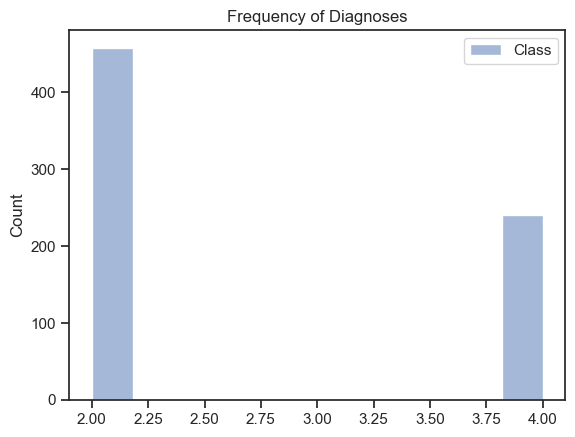

In [72]:
sns.histplot(y)
plt.title("Frequency of Diagnoses")

Text(0.5, 1.0, 'clump thickness frequency')

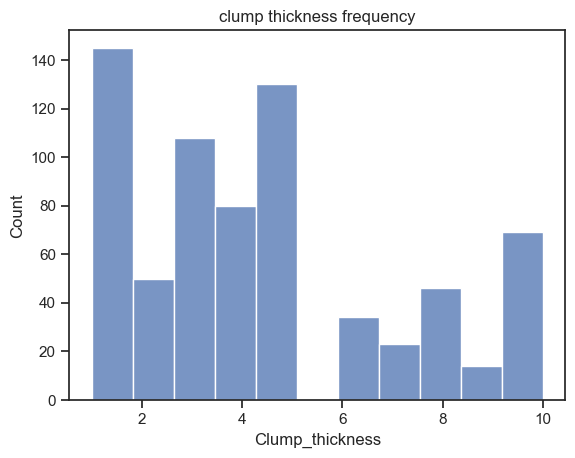

In [73]:
sns.histplot(X.Clump_thickness)
plt.title("clump thickness frequency")

Text(0, 0.5, 'Frequency')

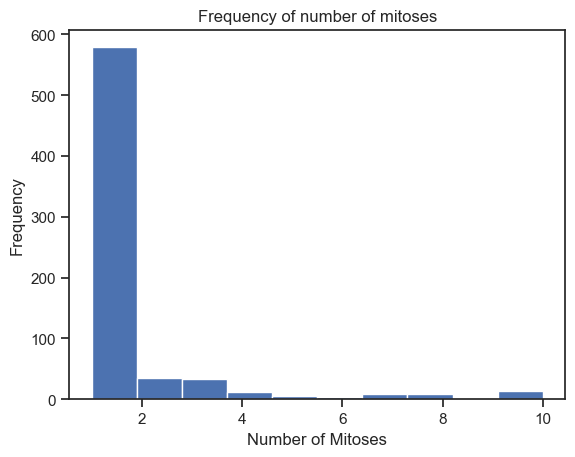

In [74]:
plt.hist(X.Mitoses)
plt.title("Frequency of number of mitoses")
plt.xlabel("Number of Mitoses")
plt.ylabel("Frequency")

### Remove empty values

In [75]:
na_val = X[X.isnull().any(axis = 1)].index

X = X.drop(na_val)
y = y.drop(na_val)
print(len(X))
print(len(y))

683
683


In [76]:
# change Y from 2,4 to 0,1 
y = np.where(y == 2, 0, 1)

### Perform Train/Test split

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=1234)

Text(0.5, 1.0, 'Frequency of Diagnoses')

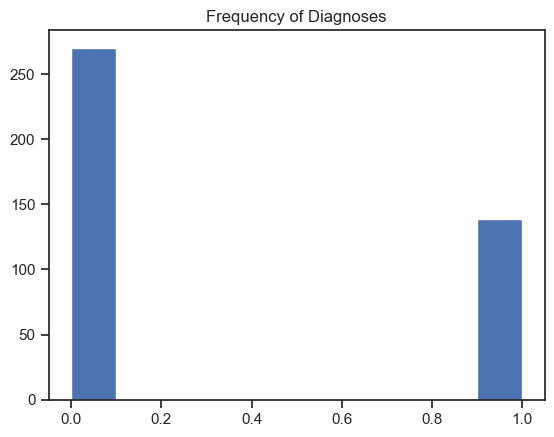

In [78]:
plt.hist(Y_train)
plt.title("Frequency of Diagnoses")

In [79]:
# remove rows from majority class
#Y_train.to_numpy()


print(f"Size of 0 Class: {len(np.where(Y_train == 0)[0])}")
print(f"Size of 1 Class: {len(np.where(Y_train != 0)[0])}")
#y = dataset.iloc[:, y.shape[0]].values

Size of 0 Class: 270
Size of 1 Class: 139


In [80]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(409, 9)
(137, 9)
(137, 9)


### Normalize Data

In [81]:
X_train.describe()
## all columns will need to be normalized 

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,409.000000,409.00000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,4.420538,2.93643,3.092910,2.814181,3.158924,3.437653,3.347188,2.672372,1.572127
std,2.824815,2.91394,2.921552,2.833569,2.197743,3.592837,2.395205,2.953105,1.767158
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.00000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.00000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.00000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [82]:
# use standard scaler to normalize data relative to X_training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [83]:
# reduce majority class to match the minority class size
X_train_2 = np.array(X_train[np.where(Y_train == 0)[0][:len(np.where(Y_train != 0)[0])],:])
X_train_4 = np.array(X_train[np.where(Y_train != 0)[0],:])

print(X_train_2.shape[0])
print(X_train_4.shape[0])
X_train_merged = np.concatenate((X_train_2, X_train_4), axis = 0)
Y_train_merged = np.concatenate((np.zeros(len(np.where(Y_train != 0)[0])) * 0, np.ones(len(np.where(Y_train != 0)[0]))), axis = 0)

print(X_train_merged.shape)
print(Y_train_merged.shape)

139
139
(278, 9)
(278,)


### Shuffling data

In [84]:
np.random.seed(0)

np.random.shuffle(X_train_merged)
np.random.shuffle(Y_train_merged)


Text(0.5, 1.0, 'Frequency of Diagnoses')

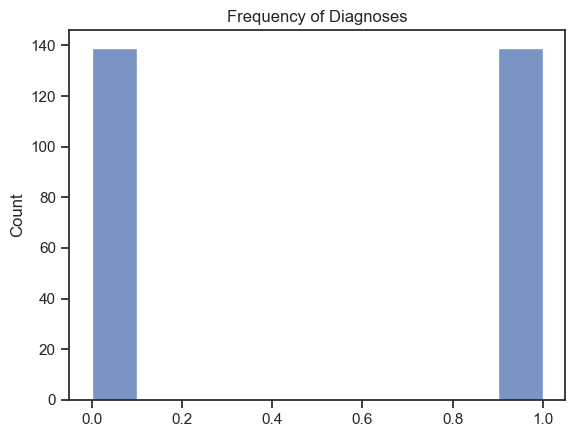

In [85]:
sns.histplot(Y_train_merged)
plt.title("Frequency of Diagnoses")

# Logistic Regression

In [86]:
def build_model(num_features, learning_rate):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units = 1, 
        input_shape=[num_features],   # input dim
        use_bias=True,               # use a bias (intercept) param
        activation="sigmoid",
    )
    )
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics = [keras.metrics.BinaryAccuracy()])
    
    return model

In [87]:
model_log = build_model(X_train_merged.shape[1], 0.001)

/Users/protech/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model_log.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
history = model_log.fit(
    x = X_train_merged,
    y = Y_train_merged,
    epochs = 5,
    validation_data = (X_val, Y_val)
)

Epoch 1/5


2025-04-14 21:20:52.441355: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - binary_accuracy: 0.5144 - loss: 0.7470 - val_binary_accuracy: 0.7372 - val_loss: 0.6017
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.5144 - loss: 0.7469 - val_binary_accuracy: 0.7372 - val_loss: 0.6018
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.5144 - loss: 0.7468 - val_binary_accuracy: 0.7372 - val_loss: 0.6019
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.5144 - loss: 0.7467 - val_binary_accuracy: 0.7372 - val_loss: 0.6019
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.5144 - loss: 0.7466 - val_binary_accuracy: 0.7372 - val_loss: 0.6020


Text(0.5, 1.0, 'Testing and Validation Model Accuracy over Epochs')

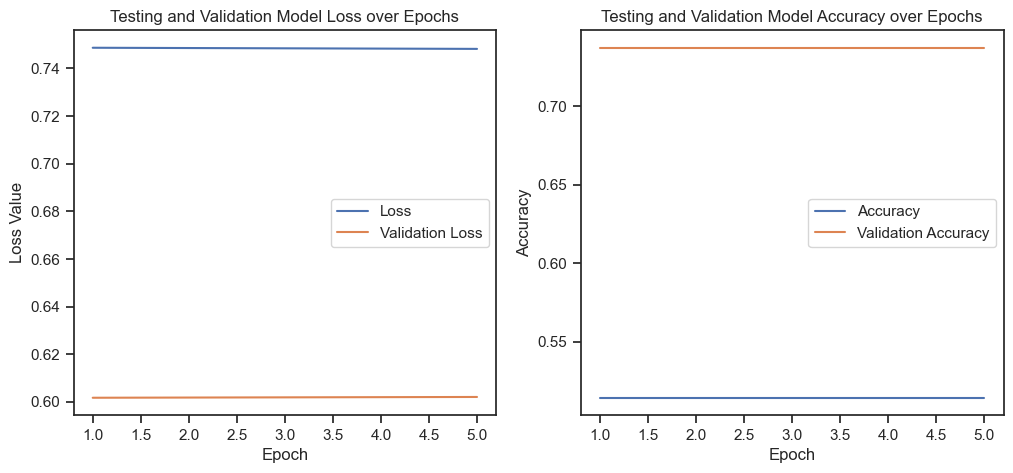

In [90]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label = "Loss")
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'], label = "Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.title("Testing and Validation Model Loss over Epochs")

plt.subplot(1, 2, 2)
plt.plot(range(1, len(history.history['binary_accuracy']) + 1), history.history['binary_accuracy'], label = "Accuracy")
plt.plot(range(1, len(history.history['val_binary_accuracy']) + 1), history.history['val_binary_accuracy'], label = "Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Testing and Validation Model Accuracy over Epochs")

### Hyperparameter tuning

#### Testing Optimizers

In [91]:
def build_model_Adam(num_features, learning_rate):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units = 1, 
        input_shape=[num_features],   # input dim
        use_bias=True,               # use a bias (intercept) param
        activation="sigmoid",
    )
    )
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics = [keras.metrics.BinaryAccuracy()])
    
    return model

model_Adam = build_model_Adam(X_train_merged.shape[1], 0.001)

def build_model_Adagrad(num_features, learning_rate):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units = 1, 
        input_shape=[num_features],   # input dim
        use_bias=True,               # use a bias (intercept) param
        activation="sigmoid",
    )
    )
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=learning_rate)
    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics = [keras.metrics.BinaryAccuracy()])
    
    return model

model_Adagrad = build_model_Adagrad(X_train_merged.shape[1], 0.001)

def build_model_Nadam(num_features, learning_rate):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units = 1, 
        input_shape=[num_features],   # input dim
        use_bias=True,               # use a bias (intercept) param
        activation="sigmoid",
    )
    )
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics = [keras.metrics.BinaryAccuracy()])
    
    return model

model_Nadam = build_model_Nadam(X_train_merged.shape[1], 0.001)

In [92]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)

hist_Adam = model_Adam.fit(
    x = X_train_merged,
    y = Y_train_merged,
    epochs = 5,
    validation_data = (X_val, Y_val)
    )

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - binary_accuracy: 0.5134 - loss: 0.8141 - val_binary_accuracy: 0.6131 - val_loss: 0.6426
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5164 - loss: 0.8117 - val_binary_accuracy: 0.6204 - val_loss: 0.6366
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.5099 - loss: 0.8100 - val_binary_accuracy: 0.6204 - val_loss: 0.6306
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5120 - loss: 0.8084 - val_binary_accuracy: 0.6204 - val_loss: 0.6252
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.5155 - loss: 0.8068 - val_binary_accuracy: 0.6350 - val_loss: 0.6205


In [93]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)

hist_Adagrad = model_Adagrad.fit(
    x = X_train_merged,
    y = Y_train_merged,
    epochs = 5,
    validation_data = (X_val, Y_val)
    )

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - binary_accuracy: 0.4874 - loss: 1.1205 - val_binary_accuracy: 0.9124 - val_loss: 0.3384
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.4786 - loss: 1.1145 - val_binary_accuracy: 0.9124 - val_loss: 0.3407
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.4725 - loss: 1.1104 - val_binary_accuracy: 0.9124 - val_loss: 0.3426
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.4725 - loss: 1.1071 - val_binary_accuracy: 0.9124 - val_loss: 0.3442
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.4725 - loss: 1.1042 - val_binary_accuracy: 0.9124 - val_loss: 0.3457


In [94]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)

hist_Nadam = model_Nadam.fit(
    x = X_train_merged,
    y = Y_train_merged,
    epochs = 5,
    validation_data = (X_val, Y_val)
    )

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - binary_accuracy: 0.5008 - loss: 0.7795 - val_binary_accuracy: 0.5255 - val_loss: 0.7376
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5008 - loss: 0.7788 - val_binary_accuracy: 0.5328 - val_loss: 0.7326
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.4947 - loss: 0.7781 - val_binary_accuracy: 0.5401 - val_loss: 0.7271
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.4947 - loss: 0.7775 - val_binary_accuracy: 0.5401 - val_loss: 0.7218
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.4926 - loss: 0.7768 - val_binary_accuracy: 0.5401 - val_loss: 0.7168


Text(0.5, 1.0, 'Validation accuracy with different Optimizers')

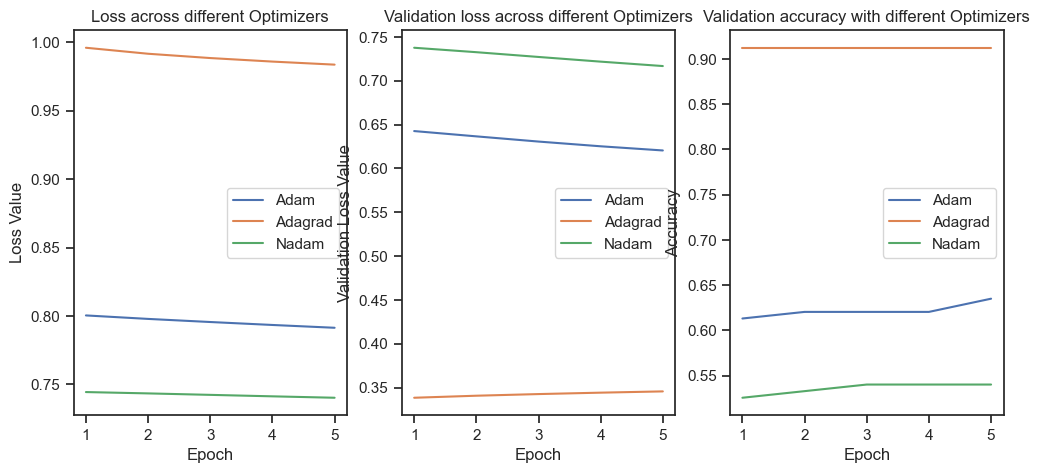

In [95]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
plt.plot(range(1, len(hist_Adam.history['loss']) + 1), hist_Adam.history['loss'], label = "Adam")
plt.plot(range(1, len(hist_Adagrad.history['loss']) + 1), hist_Adagrad.history['loss'], label = "Adagrad")
plt.plot(range(1, len(hist_Nadam.history['loss']) + 1), hist_Nadam.history['loss'], label = "Nadam")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.title("Loss across different Optimizers")

plt.subplot(1, 3, 2)
plt.plot(range(1, len(hist_Adam.history['val_loss']) + 1), hist_Adam.history['val_loss'], label = "Adam")
plt.plot(range(1, len(hist_Adagrad.history['val_loss']) + 1), hist_Adagrad.history['val_loss'], label = "Adagrad")
plt.plot(range(1, len(hist_Nadam.history['val_loss']) + 1), hist_Nadam.history['val_loss'], label = "Nadam")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Validation Loss Value")
plt.title("Validation loss across different Optimizers")

plt.subplot(1, 3, 3)
plt.plot(range(1, len(hist_Adam.history['val_binary_accuracy']) + 1), hist_Adam.history['val_binary_accuracy'], label = "Adam")
plt.plot(range(1, len(hist_Adagrad.history['val_binary_accuracy']) + 1), hist_Adagrad.history['val_binary_accuracy'], label = "Adagrad")
plt.plot(range(1, len(hist_Nadam.history['val_binary_accuracy']) + 1), hist_Nadam.history['val_binary_accuracy'], label = "Nadam")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation accuracy with different Optimizers")

#### Epoch testing

In [96]:
hist_Adam1 = model_Adam.fit(
    x = X_train_merged,
    y = Y_train_merged,
    epochs = 100,
    validation_data = (X_val, Y_val)
    )

hist_Nadam1 = model_Nadam.fit(
    x = X_train_merged,
    y = Y_train_merged,
    epochs = 100,
    validation_data = (X_val, Y_val)
    )

hist_SGD = model_log.fit(
    x = X_train_merged,
    y = Y_train_merged,
    epochs = 100,
    validation_data = (X_val, Y_val)
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - binary_accuracy: 0.5155 - loss: 0.8053 - val_binary_accuracy: 0.6423 - val_loss: 0.6164
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5155 - loss: 0.8038 - val_binary_accuracy: 0.6423 - val_loss: 0.6128
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5155 - loss: 0.8024 - val_binary_accuracy: 0.6496 - val_loss: 0.6098
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.5147 - loss: 0.8009 - val_binary_accuracy: 0.6496 - val_loss: 0.6073
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.5087 - loss: 0.7994 - val_binary_accuracy: 0.6496 - val_loss: 0.6051
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.5060 - loss: 0.7980 - val_binary_accuracy: 0.6496 - val_loss: 0.6033
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.5120 - loss: 0.7965 - val_binary_accuracy: 0.6496 - val_loss: 0.6018
Epoch 8/100
9/9 ━━━━

Text(0.5, 1.0, 'Accuracy values across different Optimizers')

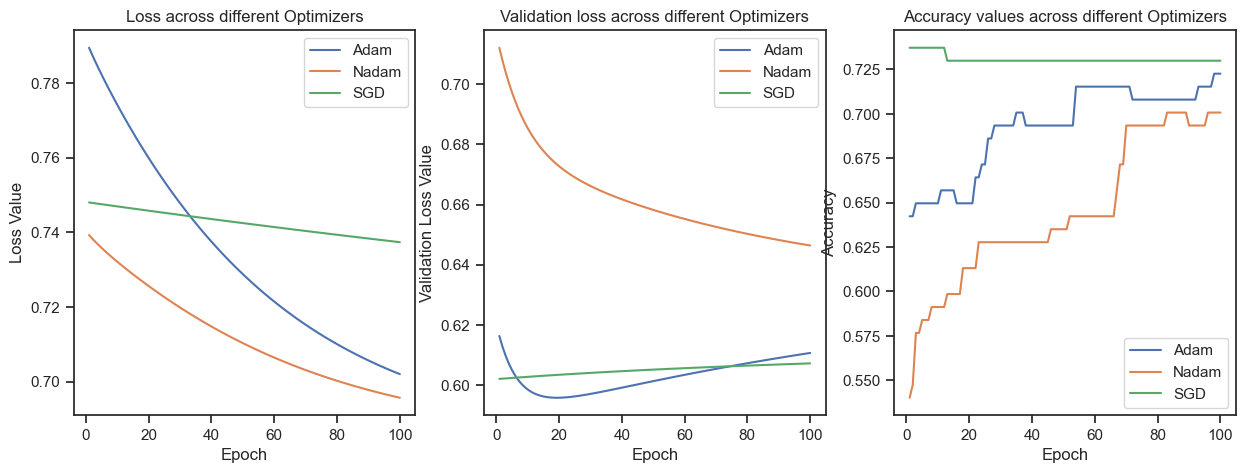

In [97]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(range(1, len(hist_Adam1.history['loss']) + 1), hist_Adam1.history['loss'], label = "Adam")
plt.plot(range(1, len(hist_Nadam1.history['loss']) + 1), hist_Nadam1.history['loss'], label = "Nadam")
plt.plot(range(1, len(hist_SGD.history['loss']) + 1), hist_SGD.history['loss'], label = "SGD")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.title("Loss across different Optimizers")

plt.subplot(1, 3, 2)
plt.plot(range(1, len(hist_Adam1.history['val_loss']) + 1), hist_Adam1.history['val_loss'], label = "Adam")
plt.plot(range(1, len(hist_Nadam1.history['val_loss']) + 1), hist_Nadam1.history['val_loss'], label = "Nadam")
plt.plot(range(1, len(hist_SGD.history['val_loss']) + 1), hist_SGD.history['val_loss'], label = "SGD")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Validation Loss Value")
plt.title("Validation loss across different Optimizers")

plt.subplot(1, 3, 3)
plt.plot(range(1, len(hist_Adam1.history['val_binary_accuracy']) + 1), hist_Adam1.history['val_binary_accuracy'], label = "Adam")
plt.plot(range(1, len(hist_Nadam1.history['val_binary_accuracy']) + 1), hist_Nadam1.history['val_binary_accuracy'], label = "Nadam")
plt.plot(range(1, len(hist_SGD.history['val_binary_accuracy']) + 1), hist_SGD.history['val_binary_accuracy'], label = "SGD")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy values across different Optimizers")

In [98]:
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='val_loss', 
verbose=1,
patience=2,
mode='min',
restore_best_weights=True)

In [99]:
tf.random.set_seed(0)

tf.keras.backend.clear_session()
# create build_model_tuner take takes a hyperparameter for tuning
class MyHyperModel1(kt.HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(
            units=1,        # output dim
            input_shape=[X_train_merged.shape[1]],   # input dim
            use_bias=True,               
            activation="sigmoid"
        ))
        optimizer = tf.keras.optimizers.Nadam(learning_rate=hp.Float(name = 'learning_rate', min_value = 0.0001, max_value = 0.01, step = 0.0001))
        model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics = [keras.metrics.BinaryAccuracy()])
        return model

    def fit(self, hp, model, *args, **kwargs):
            return model.fit(
                *args,
                **kwargs,
            )

hypermodel_test = MyHyperModel1()

tuner_test = kt.RandomSearch(
    hypermodel_test,
    objective = 'val_binary_accuracy',
    max_trials = 20,
    directory='my_dir',
    overwrite = True
)

tuner_test.search(x = X_train_merged,
    y = Y_train_merged,
    epochs = 25,
    callbacks=[early_stopping],
    validation_data = (X_val, Y_val))

Trial 20 Complete [00h 00m 02s]
val_binary_accuracy: 0.8394160866737366

Best val_binary_accuracy So Far: 0.9416058659553528
Total elapsed time: 00h 01m 05s


In [100]:
tuner_test.results_summary()

Results summary
Results in my_dir/untitled_project
Showing 10 best trials
Objective(name="val_binary_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
learning_rate: 0.0045000000000000005
Score: 0.9416058659553528

Trial 14 summary
Hyperparameters:
learning_rate: 0.0036
Score: 0.9197080135345459

Trial 09 summary
Hyperparameters:
learning_rate: 0.0002
Score: 0.8978102207183838

Trial 16 summary
Hyperparameters:
learning_rate: 0.007500000000000001
Score: 0.8978102207183838

Trial 13 summary
Hyperparameters:
learning_rate: 0.0067
Score: 0.8832116723060608

Trial 11 summary
Hyperparameters:
learning_rate: 0.007300000000000001
Score: 0.8759124279022217

Trial 18 summary
Hyperparameters:
learning_rate: 0.006300000000000001
Score: 0.8686131238937378

Trial 19 summary
Hyperparameters:
learning_rate: 0.0091
Score: 0.8394160866737366

Trial 12 summary
Hyperparameters:
learning_rate: 0.0017000000000000001
Score: 0.8321167826652527

Trial 01 summary
Hyperparameters:
learning_rate: 0.

In [101]:
model_final = tuner_test.get_best_models(1)[0]


print(f"Test aggregate accuracy: {model_final.evaluate(x = X_test, y = Y_test, verbose = 0)[1] :%}")


/Users/protech/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 7 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Test aggregate accuracy: 95.620435%


### Confusion Matrix

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3b8017f60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


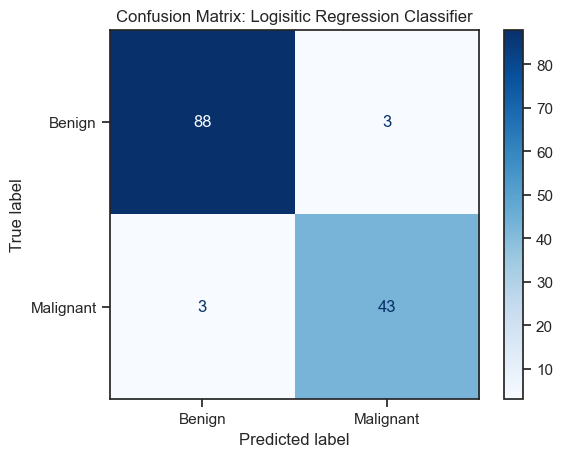

In [102]:
y_predicted = model_final.predict(x = X_test)
# convert probability numbers into binary for confusion matrix 
y_predicted = np.where(y_predicted >= 0.5, 1, 0)

## split data into sneaker and nonsneaker 
# create confusion matrix 
con_matrix = confusion_matrix(y_true= Y_test, y_pred= y_predicted)

disp = ConfusionMatrixDisplay(con_matrix, display_labels=['Benign', 'Malignant'])

disp.plot(cmap= 'Blues')
plt.title("Confusion Matrix: Logisitic Regression Classifier")
plt.show()